In [ ]:
!ls

drive  sample_data


In [ ]:
import os
os.chdir("./drive/MyDrive/pytorch-CycleGAN-and-pix2pix")

In [ ]:
!pwd

/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix


In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513
Receiving objects: 100% (2513/2513), 8.20 MiB | 12.87 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 27.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=9411c7ae879ed6293d02b9c5a9c198602a1c3bfc176ce43da4dc4018daaa397a
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=646039359ac75fe727f6d83a525abdadb5bb0d1dfa7efb0f9c136a52adaaa67c
  Sto

In [ ]:
!python test.py --dataroot ./datasets/actorGAN_test --name actorGAN --model cycle_gan

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/actorGAN_test      	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [ ]:
# 결과 : real_A, real_B, fake_A, fake_B, rec_A, rec_B
# 필요한 이미지 : real_A, fake_B
# 결과 중에서 real_A, fake_B만 추출하는 코드입니다.
# fakeB_image 폴더에 fake_B 이미지들만 복사합니다.
# realA_image 폴더에 real_A 이미지들만 복사합니다.
import os
import shutil

file_path = '/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/actorGAN/test_latest/images'
result_file_path_fake_B = '/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/actorGAN/test_latest/fakeB_images'
result_file_path_real_A = '/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/actorGAN/test_latest/realA_images'
file_names = os.listdir(file_path)

fake_B_list = []
real_A_list = []

for i in file_names:
  if "fake_B" in i:
    fake_B_list.append(i)
  if "real_A" in i:
    real_A_list.append(i)

for fake_B in fake_B_list:
    shutil.copy(f'{file_path}/{fake_B}', f'{result_file_path_fake_B}/{fake_B}')

for real_A in real_A_list:
    shutil.copy(f'{file_path}/{real_A}', f'{result_file_path_real_A}/{real_A}')

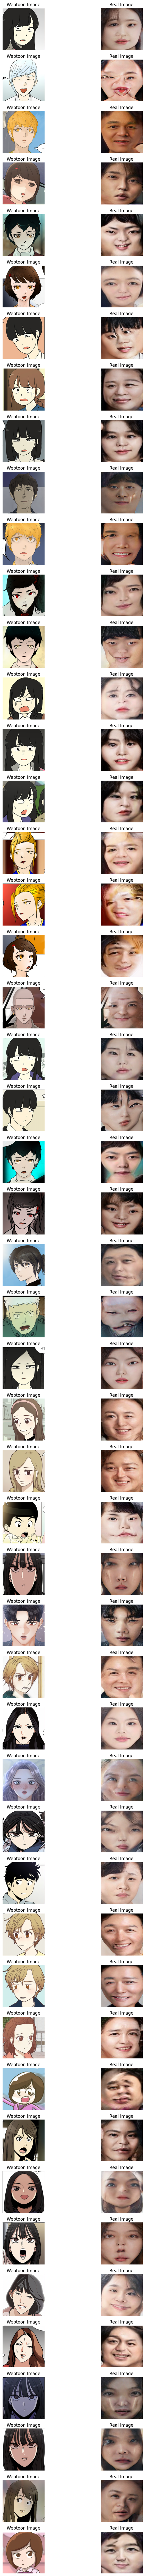

In [ ]:
# 웹툰 => 실사 시각화
import matplotlib.pyplot as plt
from PIL import Image

real_A_folder = "/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/actorGAN/test_latest/realA_images"
fake_B_folder = "/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/actorGAN/test_latest/fakeB_images"
real_A_paths = [os.path.join(real_A_folder, file) for file in os.listdir(real_A_folder)]
fake_B_paths = [os.path.join(fake_B_folder, file) for file in os.listdir(fake_B_folder)]

# 이미지 개수 확인
num_images = len(real_A_paths)

# 이미지 시각화
fig, axes = plt.subplots(num_images, 2, figsize=(10, 2*num_images))

# 각 이미지에 대해 시각화
for i in range(num_images):
    # 웹툰 이미지 로드
    webtoon_image = Image.open(real_A_paths[i])
    
    # 실사 이미지 로드
    real_image = Image.open(fake_B_paths[i])
    
    # 웹툰 이미지 출력
    axes[i, 0].imshow(webtoon_image)
    axes[i, 0].set_title('Webtoon Image')
    
    # 실사 이미지 출력
    axes[i, 1].imshow(real_image)
    axes[i, 1].set_title('Real Image')
    
    # 축 제거
    for ax in axes[i]:
        ax.axis('off')

# 이미지 간격 조정
plt.tight_layout()

# 이미지 시각화
plt.show()

In [ ]:
## import
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# 이미지의 feature를 뽑아주는 함수
# resnet과 vgg를 둘다 사용할 수 있음
def get_image_features(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img.reshape((1,) + img.shape)

    if model == 'resnet':
        model = ResNet50(weights='imagenet', input_shape=(224,224,3),include_top=False)
        preprocessed_img = resnet_preprocess_input(img.copy())

    elif model == 'vgg':
        model = VGG16(weights='imagenet', include_top=False)
        preprocessed_img = vgg_preprocess_input(img.copy())

    features = model.predict(preprocessed_img)
    return image_path, features.flatten()

In [ ]:
# 배우 얼굴 feature, 배우 폴더 경로
actor_feature_extract_resnet_list = []
actor_feature_extract_vggnet_list = []
actor_folder = "/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/datasets/actorGAN_test/testB"
actor_image_paths = [os.path.join(actor_folder, file) for file in os.listdir(actor_folder)]

In [ ]:
# gan으로 생성된 image의 feature, gan 이미지 폴더 경로
gan_feature_extract_resnet_list = []
gan_feature_extract_vggnet_list = []
gan_folder = "/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/actorGAN/test_latest/fakeB_images"
gan_image_paths = [os.path.join(gan_folder, file) for file in os.listdir(gan_folder)]

In [ ]:
# 코사인 유사도 리스트
similarities_resnet = []
similarities_vggnet = []

In [ ]:
# 배우 feautre 추출 로직 [resnet]
def main_resnet_actor():
  for actor_image_path in actor_image_paths:
    actor_features = get_image_features(actor_image_path, 'resnet')
    actor_feature_extract_resnet_list.append(actor_features)

# 배우 feature 추출 로직 [vggnet]
def main_vggnet_actor():
  for actor_image_path in actor_image_paths:
    actor_features = get_image_features(actor_image_path, 'vgg')
    actor_feature_extract_vggnet_list.append(actor_features)

# gan 생성 이미지 feature 추출 로직 [resnet]
def main_resnet_gan():
  for gan_image_path in gan_image_paths:
    gan_features = get_image_features(gan_image_path, 'resnet')
    gan_feature_extract_resnet_list.append(gan_features)

# gan 생성 이미지 feature 추출 로직 [vggnet]
def main_vggnet_gan():
  for gan_image_path in gan_image_paths:
    gan_features = get_image_features(gan_image_path, 'vgg')
    gan_feature_extract_vggnet_list.append(gan_features)

In [ ]:
main_resnet_actor()

In [ ]:
main_vggnet_actor()

In [ ]:
main_resnet_gan()

In [ ]:
main_vggnet_gan()

In [ ]:
# 코사인 유사도 구하기 [resnet]
similarities_resnet = []
for i in range(len(gan_feature_extract_resnet_list)):
  temp_list = []
  for j in range(len(actor_feature_extract_resnet_list)):
    similarity = cosine_similarity([gan_feature_extract_resnet_list[i][1]], [actor_feature_extract_resnet_list[j][1]])[0][0]
    temp_list.append({"gan_image": gan_feature_extract_resnet_list[i][0], "actor_image": actor_feature_extract_resnet_list[j][0], "similarity": similarity})
  similarities_resnet.append(temp_list)

# 'similarity' 키를 기준으로 내림차순 정렬
# similarity가 0.5 이하인건 다 날려버리는 로직도 만들어야되나 고민중.
cosine_resnet_result_list = []
for actor_features in similarities_resnet:
  sorted_actor_features = sorted(actor_features, key=lambda x: x['similarity'], reverse=True)
  temp_dict = {
      "gan_image": sorted_actor_features[0]["gan_image"],
      "first": {
          "actor_image": sorted_actor_features[0]["actor_image"],
          "similarity": sorted_actor_features[0]["similarity"]
      },
      "second": {
          "actor_image": sorted_actor_features[1]["actor_image"],
          "similarity": sorted_actor_features[1]["similarity"]
      },
      "third": {
          "actor_image": sorted_actor_features[2]["actor_image"],
          "similarity": sorted_actor_features[2]["similarity"]
      },
  }
  cosine_resnet_result_list.append(temp_dict)

[]

In [ ]:
# 코사인 유사도 구하기 [vggnet]
similarities_vggnet = []
for i in range(len(gan_feature_extract_vggnet_list)):
  temp_list = []
  for j in range(len(actor_feature_extract_vggnet_list)):
    similarity = cosine_similarity([gan_feature_extract_vggnet_list[i][1]], [actor_feature_extract_vggnet_list[j][1]])[0][0]
    temp_list.append({"gan_image": gan_feature_extract_vggnet_list[i][0], "actor_image": actor_feature_extract_vggnet_list[j][0], "similarity": similarity})
  similarities_vggnet.append(temp_list)

# 'similarity' 키를 기준으로 내림차순 정렬
# similarity가 0.5 이하인건 다 날려버리는 로직도 만들어야되나 고민중.
cosine_vgg_result_list = []
for actor_features in similarities_vggnet:
  sorted_actor_features = sorted(actor_features, key=lambda x: x['similarity'], reverse=True)
  temp_dict = {
      "gan_image": sorted_actor_features[0]["gan_image"],
      "first": {
          "actor_image": sorted_actor_features[0]["actor_image"],
          "similarity": sorted_actor_features[0]["similarity"]
      },
      "second": {
          "actor_image": sorted_actor_features[1]["actor_image"],
          "similarity": sorted_actor_features[1]["similarity"]
      },
      "third": {
          "actor_image": sorted_actor_features[2]["actor_image"],
          "similarity": sorted_actor_features[2]["similarity"]
      },
  }
  cosine_vgg_result_list.append(temp_dict)